In [16]:
%matplotlib inline
from kid_readout.measurement.io import nc
from kid_readout.measurement import basic, plot_basic

In [9]:
ncf = nc.NCFile('/data/readout/2016-06-22_172643_mmw_sweep_lo_1210.0.nc')

In [10]:
print(ncf.metadata.script_code)

import time

import numpy as np
from equipment.custom import mmwave_source
from equipment.hittite import signal_generator
from equipment.srs import lockin

from kid_readout.interactive import *
from kid_readout.equipment import hardware
from kid_readout.measurement import mmw_source_sweep, core, acquire

logger.setLevel(logging.DEBUG)

# fg = FunctionGenerator()
hittite = signal_generator.Hittite(ipaddr='192.168.0.200')
hittite.set_power(0)
hittite.on()
lockin = lockin.Lockin(LOCKIN_SERIAL_PORT)
tic = time.time()
# lockin.sensitivity = 17
print lockin.identification
print lockin.identification
# print time.time()-tic
# tic = time.time()
# print lockin.state(measurement_only=True)
# print time.time()-tic
source = mmwave_source.MMWaveSource()
source.set_attenuator_turns(6.0,6.0)
source.multiplier_input = 'hittite'
source.waveguide_twist_angle = 45
source.ttl_modulation_source = 'roach'

setup = hardware.Hardware(hittite, source, lockin)

ri = hardware_tools.r2_with_mk1()#heterodyne.Roach

In [4]:
ncf.node_names()

[u'MMWSweepList0']

In [5]:
sl = ncf.read('MMWSweepList0')

In [14]:
# The number of resonators
sl.sweep.num_channels

128

In [8]:
# The number of MMW source frequencies
len(sl.stream_list)

500

In [24]:
sssl = sl[10]

In [25]:
sss = basic.SingleSweepStream(sweep=sssl.single_sweep, stream=sssl.stream_list[0], state=sssl.state)

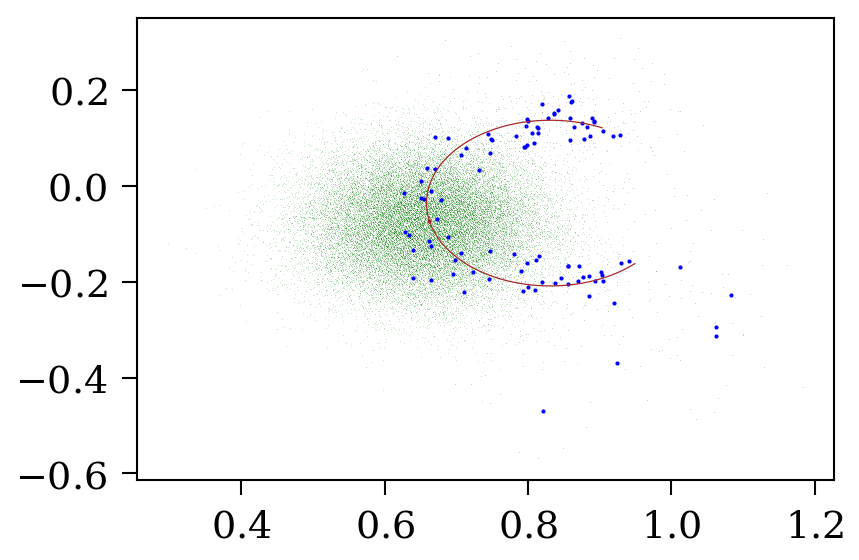

In [26]:
fig, ax = plt.subplots()
plot_basic.sss_complex_plane(sss=sss, axis=ax, normalize=True)